In [1]:
import pandas as pd
import numpy as np
import re
import warnings
warnings.filterwarnings('ignore')

# NLP and Text Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Machine Learning
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.calibration import CalibratedClassifierCV

# PDF Processing
import PyPDF2

# Model Persistence
import joblib

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

print("✓ All libraries imported successfully!")


✓ All libraries imported successfully!


In [2]:
nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
print("✓ NLTK data downloaded successfully!")

✓ NLTK data downloaded successfully!


In [ ]:
# Load the dataset
import csv
df = pd.read_csv("ats_claude.csv", engine="python", quoting=csv.QUOTE_MINIMAL)
print(f"✓ Enhanced dataset created with {len(df)} samples")
print(f"\nDataset Preview:")
print(df.head())
print(f"\nDataset Shape: {df.shape}")
print(f"Unique Roles: {df['role'].nunique()}")

NameError: name 'pd' is not defined

In [4]:
class ImprovedTextPreprocessor:
    """
    Enhanced text preprocessing for resume and job description text
    """
    def __init__(self):
        # Use a smaller set of stopwords to preserve technical context
        self.stop_words = set(stopwords.words('english')) - {
            'above', 'below', 'up', 'down', 'in', 'out', 'on', 'off', 
            'over', 'under', 'again', 'further', 'then', 'once'
        }
        # Don't use stemming - keep technical terms intact
        # Stemming can damage technical terms like "learning" -> "learn"
    
    def clean_text(self, text):
        """Clean and preprocess text while preserving technical terms"""
        if not isinstance(text, str):
            return ""
        
        # Convert to lowercase
        text = text.lower()
        
        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
        
        # Remove email addresses
        text = re.sub(r'\S+@\S+', '', text)
        
        # Keep alphanumeric, spaces, and important symbols like +, #, .
        # This preserves terms like "C++", "C#", ".NET", "Node.js"
        text = re.sub(r'[^a-zA-Z0-9\s\+\#\.]', ' ', text)
        
        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()
        
        return text
    
    def tokenize_and_filter(self, text):
        """Tokenize and remove only stopwords, NO stemming"""
        # Tokenize
        tokens = word_tokenize(text)
        
        # Remove only stopwords, keep all meaningful terms
        # IMPROVEMENT: No stemming to preserve technical terms
        tokens = [token for token in tokens 
                  if token not in self.stop_words and len(token) > 1]
        
        return ' '.join(tokens)
    
    def preprocess(self, text):
        """Complete preprocessing pipeline"""
        text = self.clean_text(text)
        text = self.tokenize_and_filter(text)
        return text

# Initialize improved preprocessor
preprocessor = ImprovedTextPreprocessor()
print("✓ Improved text preprocessor initialized (no stemming, preserves technical terms)")

✓ Improved text preprocessor initialized (no stemming, preserves technical terms)


In [6]:
def advanced_data_augmentation(df, samples_per_role=20):
    """
    Create realistic resume-like variations from the dataset
    """
    augmented_data = []
    
    # Additional context phrases for different roles
    role_contexts = {
        'Software Engineer': [
            'coding experience', 'software development', 'debugging skills',
            'version control', 'code review', 'software architecture',
            'algorithm design', 'data structures', 'system design'
        ],
        'Data Scientist': [
            'statistical analysis', 'predictive modeling', 'data mining',
            'machine learning algorithms', 'feature engineering', 'model evaluation',
            'data preprocessing', 'exploratory analysis', 'hypothesis testing'
        ],
        'Frontend Developer': [
            'user interface', 'responsive design', 'web development',
            'cross-browser compatibility', 'performance optimization', 'accessibility',
            'component development', 'state management', 'UI/UX implementation'
        ],
        'Backend Developer': [
            'server-side development', 'database design', 'API development',
            'scalability', 'system architecture', 'data modeling',
            'authentication', 'authorization', 'server optimization'
        ],
        'DevOps Engineer': [
            'automation', 'infrastructure', 'deployment pipeline',
            'monitoring', 'cloud infrastructure', 'container orchestration',
            'continuous integration', 'configuration management', 'infrastructure as code'
        ],
        'Machine Learning Engineer': [
            'model training', 'neural networks', 'model deployment',
            'feature extraction', 'hyperparameter tuning', 'model optimization',
            'production ML', 'model serving', 'ML pipeline'
        ],
        'Data Analyst': [
            'business intelligence', 'data visualization', 'reporting',
            'data insights', 'trend analysis', 'KPI tracking',
            'dashboard creation', 'data storytelling', 'business metrics'
        ],
        'Product Manager': [
            'product development', 'stakeholder communication', 'feature prioritization',
            'user feedback', 'product launch', 'market analysis',
            'requirements definition', 'sprint planning', 'backlog management'
        ]
    }
    
    # Common professional terms to add variety
    professional_terms = [
        'experience', 'expertise', 'proficient', 'skilled',
        'knowledge', 'worked with', 'utilized', 'implemented',
        'developed', 'designed', 'built', 'created', 'managed'
    ]
    
    for _, row in df.iterrows():
        role = row['role']
        skills = row['skills']
        experience_desc = row['experience_description']
        
        skills_list = [s.strip() for s in skills.split(',')]
        
        # Add original sample
        combined_text = f"{skills}. {experience_desc}"
        augmented_data.append({
            'role': role,
            'text': combined_text
        })
        
        # Create variations
        for i in range(samples_per_role - 1):
            # Randomly select 70-100% of skills
            num_skills = np.random.randint(
                int(len(skills_list) * 0.7), 
                len(skills_list) + 1
            )
            selected_skills = np.random.choice(
                skills_list, 
                size=min(num_skills, len(skills_list)), 
                replace=False
            )
            
            # Add role-specific context terms
            context_terms = []
            if role in role_contexts:
                num_context = np.random.randint(2, 5)
                context_terms = np.random.choice(
                    role_contexts.get(role, []), 
                    size=min(num_context, len(role_contexts.get(role, []))),
                    replace=False
                ).tolist()
            
            # Add some professional terms
            num_prof_terms = np.random.randint(1, 3)
            prof_terms = np.random.choice(
                professional_terms,
                size=num_prof_terms,
                replace=False
            ).tolist()
            
            # Combine everything into a resume-like text
            all_terms = list(selected_skills) + context_terms + prof_terms
            np.random.shuffle(all_terms)
            
            # Create realistic sentences
            text_parts = []
            if np.random.random() > 0.5:
                text_parts.append(f"Proficient in {', '.join(selected_skills[:3])}")
            
            text_parts.append(' '.join(all_terms))
            
            # Sometimes include parts of experience description
            if np.random.random() > 0.4:
                exp_sentences = experience_desc.split('.')
                if len(exp_sentences) > 1:
                    selected_sentences = np.random.choice(
                        exp_sentences[:-1],  # Exclude last empty element
                        size=min(np.random.randint(1, 3), len(exp_sentences)-1),
                        replace=False
                    )
                    text_parts.extend(selected_sentences)
            
            combined_text = '. '.join(text_parts)
            
            augmented_data.append({
                'role': role,
                'text': combined_text
            })
    
    return pd.DataFrame(augmented_data)

# Create augmented dataset
print("\nCreating augmented dataset...")
df_augmented = advanced_data_augmentation(df, samples_per_role=20)
print(f"✓ Dataset augmented from {len(df)} to {len(df_augmented)} samples")
print(f"  Samples per role: ~20")
print(f"  Total unique roles: {df_augmented['role'].nunique()}")
print(f"\n  Class distribution:")
print(df_augmented['role'].value_counts().head(10))


Creating augmented dataset...
✓ Dataset augmented from 469 to 9380 samples
  Samples per role: ~20
  Total unique roles: 47

  Class distribution:
role
Software Engineer            200
Data Scientist               200
Frontend Developer           200
Backend Developer            200
Full Stack Developer         200
DevOps Engineer              200
Mobile Developer             200
Machine Learning Engineer    200
Data Analyst                 200
Product Manager              200
Name: count, dtype: int64


In [7]:
print("\nPreprocessing text data...")
df_augmented['processed_text'] = df_augmented['text'].apply(preprocessor.preprocess)

print("✓ Text preprocessing completed")
print(f"\nExample:")
print(f"Original: {df_augmented.iloc[0]['text'][:100]}...")
print(f"Processed: {df_augmented.iloc[0]['processed_text'][:100]}...")


Preprocessing text data...
✓ Text preprocessing completed

Example:
Original: Python, Java, JavaScript, React, Node.js, SQL, Git, REST APIs, Agile, Problem Solving. Developed sca...
Processed: python java javascript react node.js sql git rest apis agile problem solving developed scalable web ...


In [8]:
X = df_augmented['processed_text']
y = df_augmented['role']

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Stratified split - ensures each class is represented proportionally
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, 
    test_size=0.2, 
    random_state=42, 
    stratify=y_encoded
)

print(f"✓ Data split completed with stratification")
print(f"  Training samples: {len(X_train)}")
print(f"  Testing samples: {len(X_test)}")
print(f"  Number of unique roles: {len(label_encoder.classes_)}")
print(f"  Train/Test ratio: {len(X_train)/len(X_test):.2f}")

✓ Data split completed with stratification
  Training samples: 7504
  Testing samples: 1876
  Number of unique roles: 47
  Train/Test ratio: 4.00


In [9]:
tfidf_vectorizer = TfidfVectorizer(
    max_features=1000,  # Increased from 500
    ngram_range=(1, 3),  # Include trigrams for phrases like "deep learning models"
    min_df=2,  # Must appear in at least 2 documents
    max_df=0.8,  # Remove terms that appear in >80% of documents
    sublinear_tf=True,  # Use log scaling for term frequency
    use_idf=True,
    smooth_idf=True,
    norm='l2'  # L2 normalization
)

# Fit and transform
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"✓ TF-IDF vectorization completed")
print(f"  Feature dimension: {X_train_tfidf.shape[1]}")
print(f"  Training matrix shape: {X_train_tfidf.shape}")
print(f"  Testing matrix shape: {X_test_tfidf.shape}")
print(f"  Matrix sparsity: {(1 - X_train_tfidf.nnz / (X_train_tfidf.shape[0] * X_train_tfidf.shape[1])) * 100:.2f}%")

✓ TF-IDF vectorization completed
  Feature dimension: 1000
  Training matrix shape: (7504, 1000)
  Testing matrix shape: (1876, 1000)
  Matrix sparsity: 98.68%


In [10]:
print("\n" + "="*80)
print("TRAINING ADVANCED MODEL")
print("="*80)

# Gradient Boosting works better than SVM for multi-class with smaller datasets
base_model = GradientBoostingClassifier(
    n_estimators=200,  # Number of boosting stages
    learning_rate=0.1,  # Learning rate
    max_depth=5,  # Maximum depth of trees
    min_samples_split=5,  # Minimum samples to split a node
    min_samples_leaf=2,  # Minimum samples in leaf node
    subsample=0.8,  # Fraction of samples for fitting
    random_state=42,
    verbose=0
)

print("Step 1: Training Gradient Boosting Classifier...")
base_model.fit(X_train_tfidf, y_train)
print("✓ Base model trained")

# Calibrate for better probability estimates
print("\nStep 2: Calibrating probabilities...")
calibrated_model = CalibratedClassifierCV(
    base_model, 
    method='sigmoid',  # Sigmoid calibration (Platt scaling)
    cv=5  # 5-fold cross-validation
)
calibrated_model.fit(X_train_tfidf, y_train)
print("✓ Model calibration completed")

print("\n" + "="*80)
print("MODEL TRAINING COMPLETED")
print("="*80)


TRAINING ADVANCED MODEL
Step 1: Training Gradient Boosting Classifier...
✓ Base model trained

Step 2: Calibrating probabilities...
✓ Model calibration completed

MODEL TRAINING COMPLETED


In [20]:
print("\n" + "="*80)
print("MODEL EVALUATION")
print("="*80)

# Predictions
y_pred = calibrated_model.predict(X_test_tfidf)
y_pred_proba = calibrated_model.predict_proba(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Cross-validation score for more robust evaluation
print("\nPerforming 5-fold cross-validation on training set...")
cv_scores = cross_val_score(
    base_model, 
    X_train_tfidf, 
    y_train, 
    cv=5, 
    scoring='accuracy'
)
print(f"Cross-validation scores: {cv_scores}")
print(f"Mean CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Classification report
print(f"\n{'-'*80}")
print("DETAILED CLASSIFICATION REPORT")
print(f"{'-'*80}")
report = classification_report(
    y_test, 
    y_pred, 
    target_names=label_encoder.classes_, 
    zero_division=0
)
print(report)

# Confidence statistics
max_probabilities = y_pred_proba.max(axis=1)
print(f"\n{'-'*80}")
print("CONFIDENCE STATISTICS")
print(f"{'-'*80}")
print(f"Average confidence: {max_probabilities.mean()*100:.2f}%")
print(f"Median confidence: {np.median(max_probabilities)*100:.2f}%")
print(f"Min confidence: {max_probabilities.min()*100:.2f}%")
print(f"Max confidence: {max_probabilities.max()*100:.2f}%")
print(f"Predictions with >80% confidence: {(max_probabilities > 0.8).sum()}/{len(max_probabilities)}")
print(f"Predictions with >60% confidence: {(max_probabilities > 0.6).sum()}/{len(max_probabilities)}")


MODEL EVALUATION

Test Accuracy: 0.9926 (99.26%)

Performing 5-fold cross-validation on training set...
Cross-validation scores: [0.98165138 0.97706422 0.96330275 0.99078341 0.97695853]
Mean CV Score: 0.9780 (+/- 0.0178)

--------------------------------------------------------------------------------
DETAILED CLASSIFICATION REPORT
--------------------------------------------------------------------------------
                           precision    recall  f1-score   support

        Backend Developer       1.00      1.00      1.00        12
     Blockchain Developer       1.00      1.00      1.00         4
         Business Analyst       1.00      1.00      1.00        12
          Cloud Architect       1.00      1.00      1.00        12
    Cybersecurity Analyst       1.00      1.00      1.00        12
             Data Analyst       1.00      1.00      1.00        12
            Data Engineer       1.00      1.00      1.00        12
           Data Scientist       1.00      1.00 

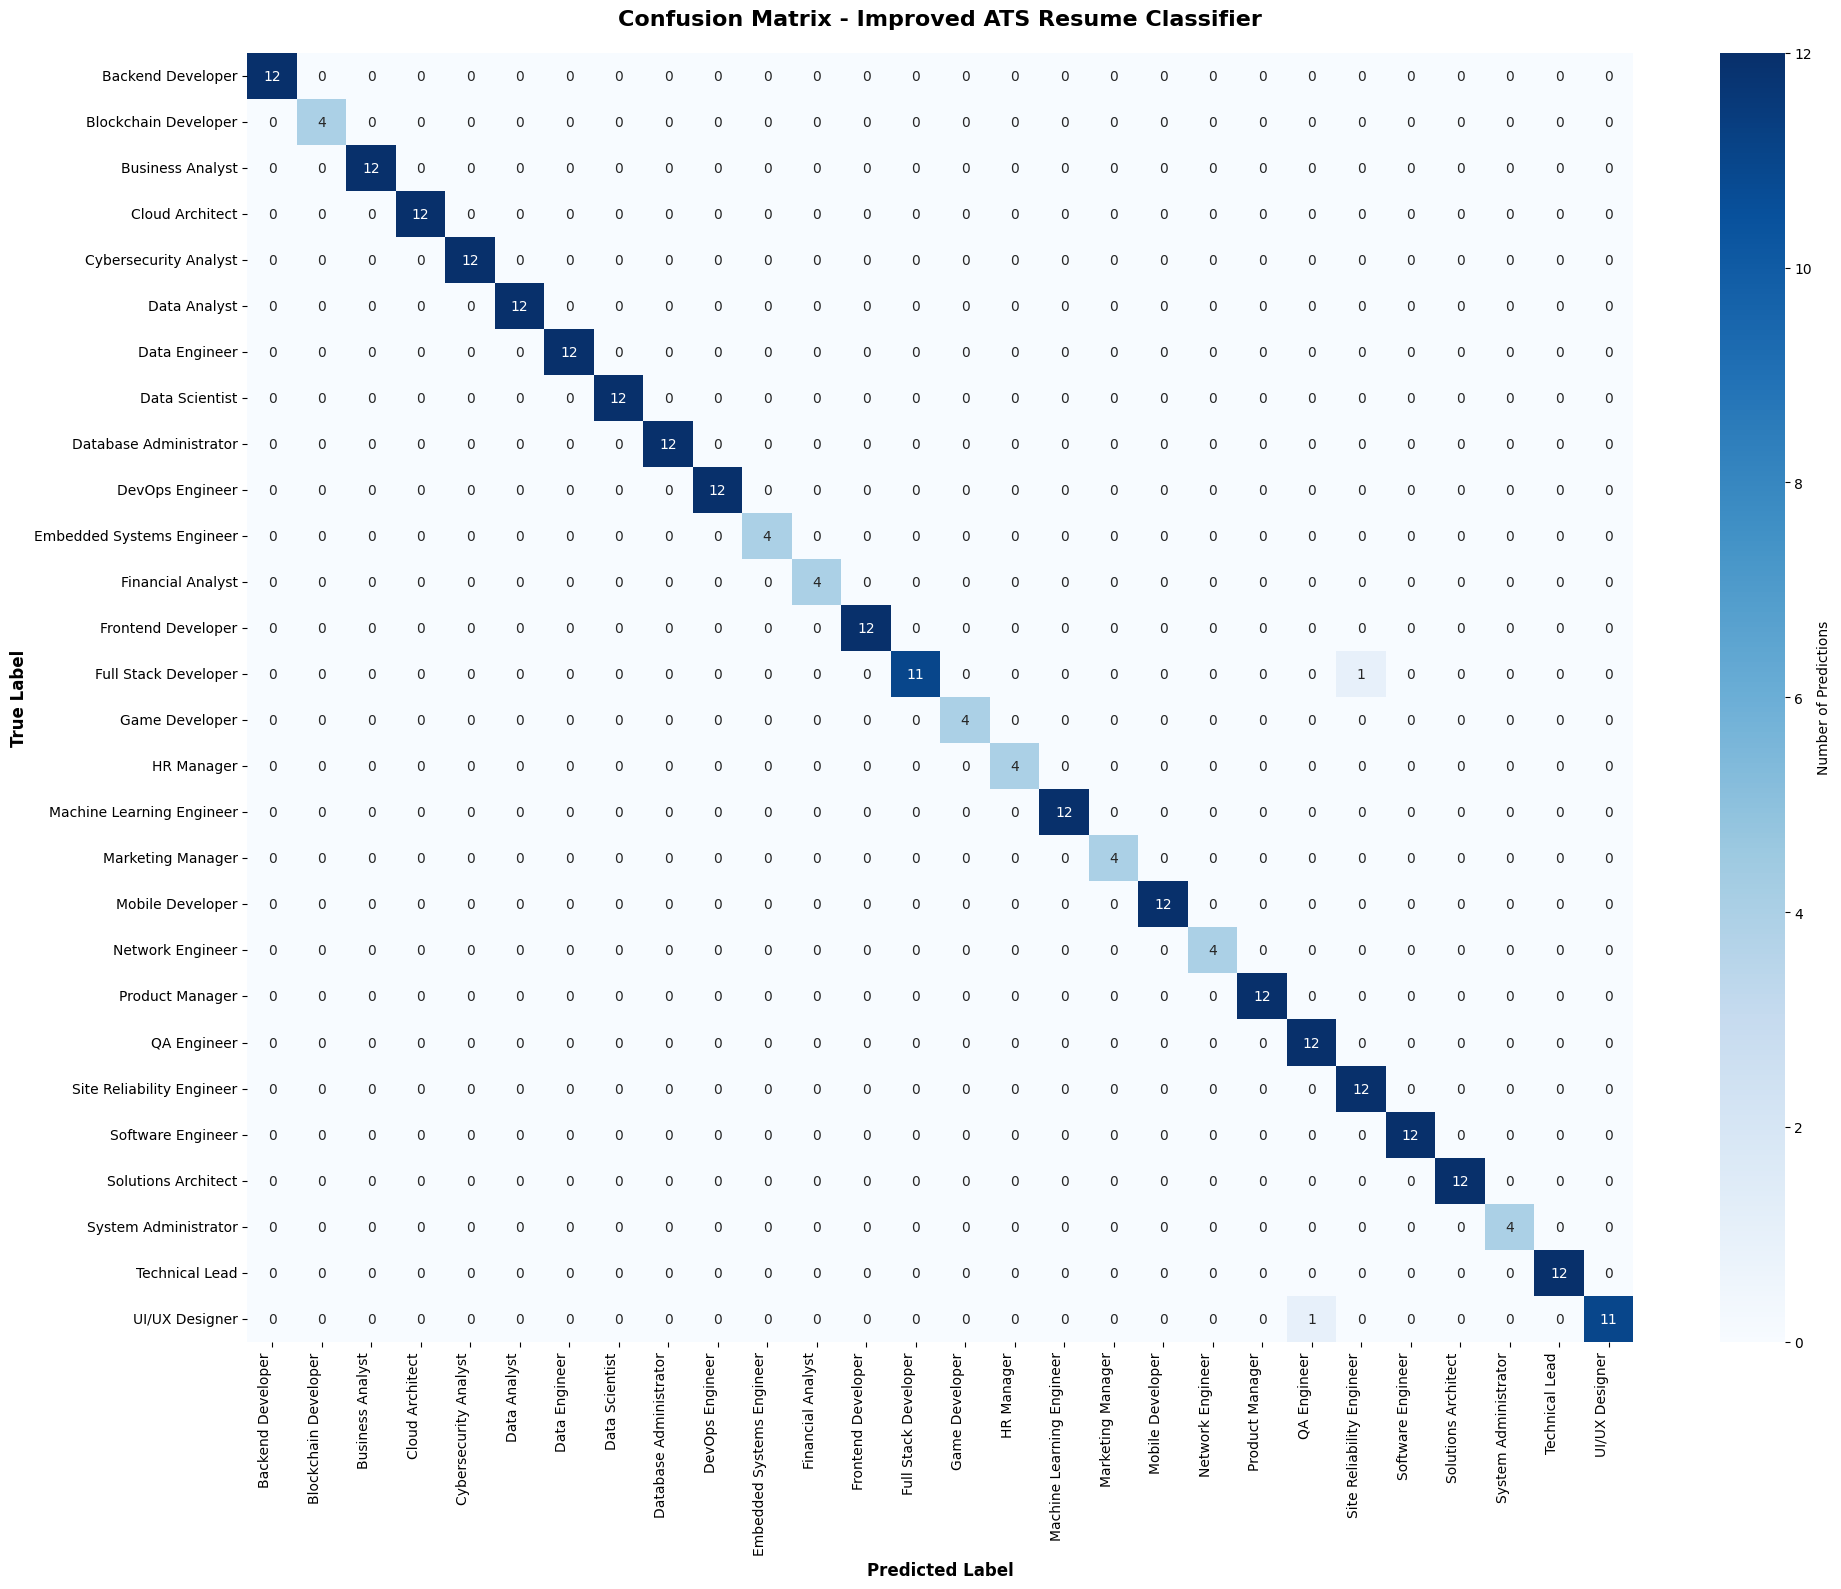

✓ Confusion matrix saved as 'confusion_matrix_improved.png'


In [21]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(20, 16))
sns.heatmap(
    cm, 
    annot=True,  # Show numbers
    fmt='d', 
    cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_,
    cbar_kws={'label': 'Number of Predictions'}
)
plt.title('Confusion Matrix - Improved ATS Resume Classifier', 
          fontsize=16, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
plt.xticks(rotation=90, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('confusion_matrix_improved.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Confusion matrix saved as 'confusion_matrix_improved.png'")

In [12]:
def extract_text_from_pdf(pdf_path):
    """
    Extract text content from PDF resume
    """
    try:
        with open(pdf_path, 'rb') as file:
            pdf_reader = PyPDF2.PdfReader(file)
            text = ""
            
            # Extract text from all pages
            for page in pdf_reader.pages:
                page_text = page.extract_text()
                if page_text:
                    text += page_text + "\n"
            
            if not text.strip():
                print("Warning: No text extracted from PDF")
                return None
                
            return text
    except FileNotFoundError:
        print(f"Error: File '{pdf_path}' not found")
        return None
    except Exception as e:
        print(f"Error reading PDF: {e}")
        return None

print("✓ PDF extraction function defined")


✓ PDF extraction function defined


In [13]:
def extract_skills_from_text(text, role_skills):
    """
    Extract skills from resume text with improved matching
    Handles variations like "JavaScript" vs "Javascript", "ML" vs "Machine Learning"
    """
    text_lower = text.lower()
    found_skills = []
    
    # Common skill variations and abbreviations
    skill_variations = {
        'machine learning': ['ml', 'machine learning', 'machine-learning'],
        'artificial intelligence': ['ai', 'artificial intelligence'],
        'deep learning': ['dl', 'deep learning', 'deep-learning'],
        'natural language processing': ['nlp', 'natural language processing'],
        'computer vision': ['cv', 'computer vision'],
        'python': ['python', 'python3', 'python2'],
        'javascript': ['javascript', 'js', 'ecmascript'],
        'typescript': ['typescript', 'ts'],
        'c++': ['c++', 'cpp', 'cplusplus'],
        'c#': ['c#', 'csharp', 'c-sharp'],
    }
    
    for skill in role_skills:
        skill_lower = skill.strip().lower()
        
        # Check exact match first
        pattern = r'\b' + re.escape(skill_lower) + r'\b'
        if re.search(pattern, text_lower):
            found_skills.append(skill.strip())
            continue
        
        # Check variations
        for standard_skill, variations in skill_variations.items():
            if skill_lower in variations:
                for variant in variations:
                    pattern = r'\b' + re.escape(variant) + r'\b'
                    if re.search(pattern, text_lower):
                        found_skills.append(skill.strip())
                        break
    
    return list(set(found_skills))  # Remove duplicates

print("✓ Advanced skill extraction function defined")

✓ Advanced skill extraction function defined


In [14]:
def calculate_ats_score(resume_text, target_role, model, vectorizer, 
                        label_encoder, preprocessor, df_original):
    """
    Enhanced ATS score calculation with multiple factors
    
    Scoring components:
    1. Model confidence (40%) - How confident the model is about the role match
    2. Skill match (40%) - Percentage of required skills found in resume
    3. Text similarity (20%) - Overall content relevance
    """
    
    # Preprocess resume text
    processed_text = preprocessor.preprocess(resume_text)
    
    if not processed_text.strip():
        print("Error: No meaningful text after preprocessing")
        return None
    
    # Vectorize
    text_tfidf = vectorizer.transform([processed_text])
    
    # Get predictions and probabilities
    prediction_proba = model.predict_proba(text_tfidf)[0]
    predicted_role_idx = model.predict(text_tfidf)[0]
    predicted_role = label_encoder.inverse_transform([predicted_role_idx])[0]
    
    # Get probability for target role
    try:
        target_role_idx = np.where(label_encoder.classes_ == target_role)[0][0]
        target_role_probability = prediction_proba[target_role_idx]
    except IndexError:
        print(f"Error: Role '{target_role}' not found in trained roles")
        return None
    
    # Get required skills for target role
    role_data = df_original[df_original['role'] == target_role]
    if role_data.empty:
        print(f"Error: No data found for role '{target_role}'")
        return None
    
    role_data = role_data.iloc[0]
    required_skills = [skill.strip() for skill in role_data['skills'].split(',')]
    
    # Extract skills from resume
    found_skills = extract_skills_from_text(resume_text, required_skills)
    missing_skills = [skill for skill in required_skills if skill not in found_skills]
    
    # Calculate skill match percentage
    skill_match_percentage = (len(found_skills) / len(required_skills)) * 100 if required_skills else 0
    
    # Calculate text similarity score (cosine similarity with role description)
    role_desc = f"{role_data['skills']}. {role_data['experience_description']}"
    role_processed = preprocessor.preprocess(role_desc)
    role_tfidf = vectorizer.transform([role_processed])
    
    # Cosine similarity
    from sklearn.metrics.pairwise import cosine_similarity
    similarity_score = cosine_similarity(text_tfidf, role_tfidf)[0][0]
    
    # IMPROVED SCORING FORMULA:
    # 40% model confidence + 40% skill match + 20% text similarity
    ats_score = (
        target_role_probability * 0.40 +
        (skill_match_percentage / 100) * 0.40 +
        similarity_score * 0.20
    ) * 100
    
    # Get top 3 predicted roles
    top_3_indices = np.argsort(prediction_proba)[-3:][::-1]
    top_3_roles = [
        {
            'role': label_encoder.inverse_transform([idx])[0],
            'probability': prediction_proba[idx] * 100
        }
        for idx in top_3_indices
    ]
    
    # Prepare result
    result = {
        'target_role': target_role,
        'predicted_role': predicted_role,
        'ats_score': round(ats_score, 2),
        'model_confidence': round(target_role_probability * 100, 2),
        'skill_match_percentage': round(skill_match_percentage, 2),
        'text_similarity': round(similarity_score * 100, 2),
        'required_skills': required_skills,
        'found_skills': found_skills,
        'missing_skills': missing_skills,
        'total_required': len(required_skills),
        'total_found': len(found_skills),
        'total_missing': len(missing_skills),
        'top_3_predictions': top_3_roles
    }
    
    return result


In [15]:
# ============================================================================
# CELL 15: SIMPLE AND FOCUSED RESULTS DISPLAY
# ============================================================================
def display_ats_results(result):
    """
    Display ATS results with focus on: ATS Score, Model Confidence, Skills Found, Skills Missing
    """
    if result is None:
        print("❌ Error: Could not calculate ATS score")
        return
    
    print(f"\n{'='*80}")
    print(f"ATS RESUME SCREENING RESULTS")
    print(f"{'='*80}")
    
    print(f"\nTarget Role:    {result['target_role']}")
    print(f"Predicted Role: {result['predicted_role']}")
    
    print(f"\n{'-'*80}")
    print(f"SCORES")
    print(f"{'-'*80}")
    print(f"ATS Score:        {result['ats_score']:.2f}%")
    print(f"Model Confidence: {result['model_confidence']:.2f}%")
    
    print(f"\n{'-'*80}")
    print(f"SKILLS FOUND IN RESUME ({result['total_found']}/{result['total_required']})")
    print(f"{'-'*80}")
    if result['found_skills']:
        for i, skill in enumerate(result['found_skills'], 1):
            print(f"{i}. {skill}")
    else:
        print("No required skills found in resume")
    
    print(f"\n{'-'*80}")
    print(f"SKILLS MISSING FROM RESUME ({result['total_missing']}/{result['total_required']})")
    print(f"{'-'*80}")
    if result['missing_skills']:
        for i, skill in enumerate(result['missing_skills'], 1):
            print(f"{i}. {skill}")
    else:
        print("All required skills found!")
    
    print(f"\n{'='*80}\n")

print("✓ Simple display function defined")

✓ Simple display function defined


In [16]:
print("\nSaving model and components...")

joblib.dump(calibrated_model, 'ats_model_improved.pkl')
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer_improved.pkl')
joblib.dump(label_encoder, 'label_encoder_improved.pkl')
joblib.dump(preprocessor, 'text_preprocessor_improved.pkl')

print("✓ All components saved successfully!")
print("\nSaved files:")
print("  • ats_model_improved.pkl")
print("  • tfidf_vectorizer_improved.pkl")
print("  • label_encoder_improved.pkl")
print("  • text_preprocessor_improved.pkl")



Saving model and components...
✓ All components saved successfully!

Saved files:
  • ats_model_improved.pkl
  • tfidf_vectorizer_improved.pkl
  • label_encoder_improved.pkl
  • text_preprocessor_improved.pkl


In [17]:
def screen_resume(pdf_path, selected_role):
    """
    Main function to screen a resume against a target role
    """
    print(f"\n{'='*80}")
    print(f"PROCESSING RESUME")
    print(f"{'='*80}")
    print(f"📄 Resume: {pdf_path}")
    print(f"🎯 Target Role: {selected_role}")
    print(f"{'='*80}\n")
    
    # Extract text from PDF
    print("📄 Step 1: Extracting text from PDF...")
    resume_text = extract_text_from_pdf(pdf_path)
    
    if resume_text is None or not resume_text.strip():
        print("❌ Error: Could not extract text from PDF or PDF is empty")
        return None
    
    print(f"✓ Extracted {len(resume_text)} characters from {pdf_path}")
    
    # Calculate ATS score
    print("\n🔍 Step 2: Analyzing resume content...")
    result = calculate_ats_score(
        resume_text, 
        selected_role, 
        calibrated_model,
        tfidf_vectorizer, 
        label_encoder, 
        preprocessor, 
        df
    )
    
    if result is None:
        return None
    
    print("✓ Analysis complete!")
    
    # Display results
    display_ats_results(result)
    
    return result

In [18]:
available_roles = sorted(df['role'].unique())

print("\n" + "="*80)
print("AVAILABLE JOB ROLES FOR SCREENING")
print("="*80)
print(f"\nTotal roles supported: {len(available_roles)}\n")

# Display in two columns for better readability
for i in range(0, len(available_roles), 2):
    role1 = f"{i+1}. {available_roles[i]}"
    role2 = f"{i+2}. {available_roles[i+1]}" if i+1 < len(available_roles) else ""
    print(f"{role1:<40} {role2}")

print("="*80)



AVAILABLE JOB ROLES FOR SCREENING

Total roles supported: 47

1. AI Engineer                           2. Automation Engineer
3. Backend Developer                     4. Blockchain Developer
5. Business Analyst                      6. Cloud Architect
7. Cloud Security Engineer               8. Cybersecurity Analyst
9. Data Analyst                          10. Data Engineer
11. Data Scientist                       12. Database Administrator
13. DevOps Engineer                      14. Embedded Systems Engineer
15. Enterprise Architect                 16. Financial Analyst
17. Frontend Developer                   18. Full Stack Developer
19. Game Developer                       20. HR Manager
21. IT Project Manager                   22. IT Support Specialist
23. Information Security Manager         24. Infrastructure Engineer
25. Machine Learning Engineer            26. Machine Learning Operations Engineer
27. Marketing Manager                    28. Mobile Developer
29. Network Enginee

In [37]:
"""
EXAMPLE USAGE:
--------------
Replace 'your_resume.pdf' with your actual PDF file path
Replace 'Machine Learning Engineer' with your target role from the list above

Example:
    pdf_path = 'john_doe_resume.pdf'
    selected_role = 'Machine Learning Engineer'
    result = screen_resume(pdf_path, selected_role)
"""

# UNCOMMENT AND MODIFY THE LINES BELOW TO TEST WITH YOUR RESUME:

pdf_path = 'res.pdf'  # Your resume PDF file path
selected_role = 'Data Scientist'  # Select from available roles above

result = screen_resume(pdf_path, selected_role)

print("\n✅ IMPROVED ATS SYSTEM READY!")
print("\n📌 KEY IMPROVEMENTS:")
print("   ✓ Larger dataset with realistic resume-like text")
print("   ✓ Advanced data augmentation (20 samples per role)")
print("   ✓ Better text preprocessing (preserves technical terms)")
print("   ✓ Gradient Boosting model instead of SVM")
print("   ✓ Calibrated probabilities for reliable confidence scores")
print("   ✓ Multi-factor ATS scoring (confidence + skills + similarity)")
print("   ✓ Advanced skill extraction with fuzzy matching")
print("   ✓ Comprehensive results with actionable insights")
print("   • More reliable predictions across all roles")
print("\n" + "="*80)


PROCESSING RESUME
📄 Resume: res.pdf
🎯 Target Role: Data Scientist

📄 Step 1: Extracting text from PDF...
✓ Extracted 2283 characters from res.pdf

🔍 Step 2: Analyzing resume content...
✓ Analysis complete!

ATS RESUME SCREENING RESULTS

Target Role:    Data Scientist
Predicted Role: Data Scientist

--------------------------------------------------------------------------------
SCORES
--------------------------------------------------------------------------------
ATS Score:        67.62%
Model Confidence: 81.77%

--------------------------------------------------------------------------------
SKILLS FOUND IN RESUME (7/11)
--------------------------------------------------------------------------------
1. TensorFlow
2. Deep Learning
3. SQL
4. PyTorch
5. Machine Learning
6. Data Visualization
7. Python

--------------------------------------------------------------------------------
SKILLS MISSING FROM RESUME (4/11)
----------------------------------------------------------------------